# Create submission

In [1]:
import os, random
import ntpath
import SimpleITK
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from utils import BatchGenerator, shift_and_stitch, get_output_size, read_img
import callbacks
from models import unet
import pickle
import time

from keras import backend as K
from keras.engine import Input, Model
from keras.layers import Conv3D, MaxPooling3D, Activation, Deconvolution3D, Cropping3D, UpSampling3D, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers.merge import concatenate

C:\Users\denha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_pickle("train-data-filelist.pkl")

In [3]:
patch_size = (132,132,116)
output_size = get_output_size(patch_size)

In [4]:
model = unet(input_shape=[*patch_size,1])
model.load_weights('weights-2006-105451.hdf5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 132, 132, 116, 1)  0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 130, 130, 114, 32) 896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 130, 130, 114, 32) 128       
_________________________________________________________________
activation_1 (Activation)    (None, 130, 130, 114, 32) 0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 128, 128, 112, 32) 27680     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 112, 32) 128       
_________________________________________________________________
activation_2 (Activation)    (None, 128, 128, 112, 32) 0         
__________

In [9]:
mask_preds = []
for path in data['image'].values[0:5]:
    image = read_img(path)
    output = shift_and_stitch(model, image, patch_size, output_size, output_size)
    mask_preds.append(output)

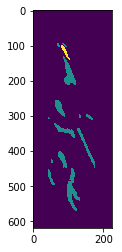

In [17]:
plt.imshow(mask_preds[0][:,:,75])

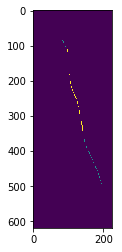

In [18]:
true = read_img(data['fissuremask'].values[0])
plt.imshow(true[:,:,75])

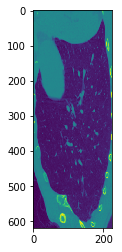

In [20]:
image = read_img(data['image'].values[0])
plt.imshow(image[:,:,75])